# Library

In [3]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

In [19]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import model,scoring

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load dataset

In [4]:
# get the dataset
def get_dataset(n_samples):
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

In [5]:
X,y = get_dataset(n_samples = 1000)

# Load model and create voting

>knn1 | mean = 0.873 | std = 0.030
>knn3 | mean = 0.889 | std = 0.038
>knn5 | mean = 0.895 | std = 0.031
>knn7 | mean = 0.899 | std = 0.035
>knn9 | mean = 0.900 | std = 0.033
>hard_voting | mean = 0.902 | std = 0.034


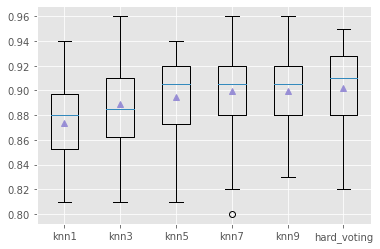

In [14]:
model_hard = model.voting_ensembles(X,y,'check_voting','hard')

>svm1 | mean = 0.855 | std = 0.035
>svm2 | mean = 0.859 | std = 0.034
>svm3 | mean = 0.890 | std = 0.035
>svm4 | mean = 0.808 | std = 0.037
>svm5 | mean = 0.850 | std = 0.037
>soft_voting | mean = 0.923 | std = 0.026


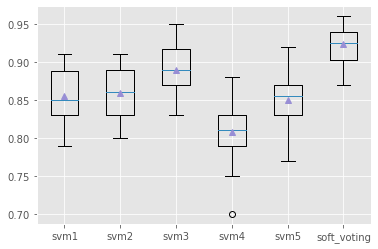

In [15]:
model_soft = model.voting_ensembles(X,y,'check_voting','soft')

# Predict

In [16]:
# make a prediction for one example
X_test,y_test = get_dataset(n_samples = 100)

In [17]:
model_soft = model.voting_ensembles(X,y,'predict','soft')
y_pred = model_soft.predict(X_test)
y_prob = model_soft.predict_proba(X_test)[:, 1]

comfusion matrix = 
[[475  26]
 [ 24 475]]


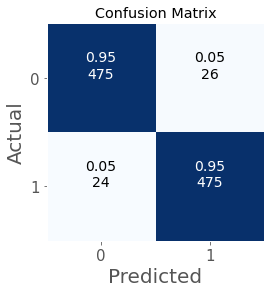


accuracy_score =  0.95
balanced_accuracy_score =  0.95

precision score =  0.9481
average precision score =  0.9265
recall score =  0.9519

F1 score =  0.95
F2 score =  0.9489
F3 score =  0.9485
F_beta score =  0.9489
Matthews Correlation Coefficient score =  0.9

AUC of Precision-Recall Curve on Testing =  0.9915
Best Threshold for Precision-Recall Curve = 0.523827
F-Score = 0.961
AUC of ROC =  0.9906

Best Threshold for ROC = 0.523827
G-Mean = 0.961
Best Threshold with Youden’s J statistic = 0.523827

Cohens kappa =  0.9
Gini =  0.9829

Expected Approval Rate =  0.501
Expected Default Rate =  0.0519

classification_report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       501
           1       0.95      0.95      0.95       499

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000




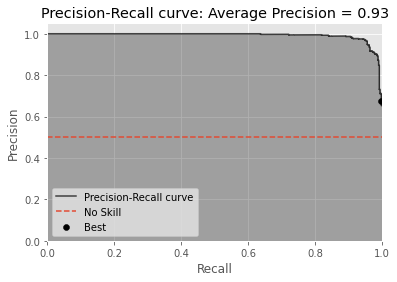

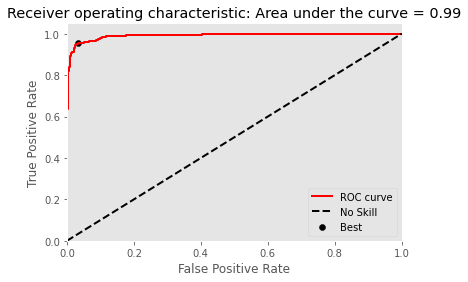


time span=  1


In [24]:
scoring.print_score(y_test,y_pred,y_probs=y_prob,types='classification',labels=[0,1],time1=1,time2=2)

In [25]:
model_hard = model.voting_ensembles(X,y,'predict','hard')
y_pred = model_hard.predict(X_test)

comfusion matrix = 
[[475  26]
 [ 24 475]]


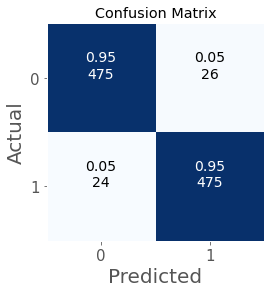


accuracy_score =  0.95
balanced_accuracy_score =  0.95

precision score =  0.9481
average precision score =  0.9265
recall score =  0.9519

F1 score =  0.95
F2 score =  0.9489
F3 score =  0.9485
F_beta score =  0.9489
Matthews Correlation Coefficient score =  0.9

AUC of Precision-Recall Curve on Testing =  0.962
Best Threshold for Precision-Recall Curve = 1.000000
F-Score = 0.950
AUC of ROC =  0.95

Best Threshold for ROC = 1.000000
G-Mean = 0.950
Best Threshold with Youden’s J statistic = 1.000000

Cohens kappa =  0.9
Gini =  0.924

Expected Approval Rate =  0.501
Expected Default Rate =  0.0519

classification_report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       501
           1       0.95      0.95      0.95       499

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000




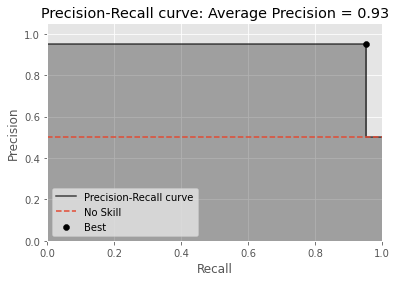

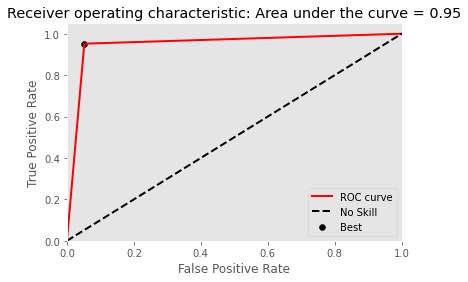


time span=  1


In [26]:
scoring.print_score(y_test,y_pred,y_probs=y_pred,types='classification',labels=[0,1],time1=1,time2=2)